In [1]:
# load libraries
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(arrow)))
suppressWarnings(suppressPackageStartupMessages(library(patchwork)))
# import ggplot theme
source("../../utils/figure_themes.r")

In [2]:
# path to the anova data
sum_aggregated_anova_genotype_df_path <- file.path("..","..","data","6.analysis_results","sum_aggregated_anova_results.parquet")
sum_aggregated_data_path <- file.path("..","..","data","5.converted_data","sum_aggregated_data.parquet")
fig_path <- file.path("..","figures","sum_aggregated")
# create the figure directory if it does not exist
if (!dir.exists(fig_path)){
  dir.create(fig_path, recursive = TRUE)
}

# read the data
sum_aggregated_data_df <- arrow::read_parquet(sum_aggregated_data_path)
head(sum_aggregated_data_df)

# read the anova data
sum_aggregated_anova_df <- arrow::read_parquet(sum_aggregated_anova_genotype_df_path)


Metadata_genotype,Metadata_replicate,AreaShape_Area,AreaShape_CentralMoment_0_0,AreaShape_CentralMoment_0_1,AreaShape_CentralMoment_0_2,AreaShape_CentralMoment_0_3,AreaShape_CentralMoment_1_0,AreaShape_CentralMoment_1_1,AreaShape_CentralMoment_1_2,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high,1,1.192966,1.192966,0.54175256,-0.09847487,0.7817362,4.2018303,-0.9278737,-0.08596449,⋯,-0.2082104,-0.23807266,-1.0917116,-1.0500536,-1.0866094,-1.0891776,-1.1151266,-1.1242028,-1.1179528,-1.1217436
high,10,2.477908,2.477908,1.31962606,3.44472838,-1.7485946,0.3583902,-3.2895193,1.65054027,⋯,1.2939544,1.27071208,1.2613638,1.2841820,1.1875076,1.2705476,1.1157257,1.0969468,1.1219693,1.0955390
high,11,4.262414,4.262414,1.26173108,2.85293883,0.5831822,3.6024137,-0.5413249,-0.32861304,⋯,1.3735418,1.35646086,1.1047649,1.1416459,1.0525320,1.0969493,0.9976509,0.9725370,1.0001664,0.9804259
high,12,2.402476,2.402476,0.04988604,2.55823835,-0.9281710,-3.3057063,-1.9646186,0.21535923,⋯,0.6190094,0.61786654,-0.1095573,-0.1197524,-0.1967998,-0.1358605,-0.2075640,-0.2187347,-0.2021711,-0.2135436
high,13,2.389777,2.389777,-1.10873607,-0.06893111,0.1017650,-2.6899598,-0.9673454,-1.58886766,⋯,0.1134128,0.09548279,-0.6503412,-0.5913477,-0.6420772,-0.6448712,-0.6968174,-0.7125095,-0.7005716,-0.7043354
high,14,4.553584,4.553584,-4.77707191,3.38343805,0.2514737,-1.4277740,-3.1808175,0.22174791,⋯,2.0541319,2.05166800,2.5108502,2.5418673,2.4192843,2.4975101,2.3347969,2.2960604,2.3437433,2.3082576


## Genotype, side and identity level data

### ANOVA means

In [3]:

sum_aggregated_anova_df$log10_anova_p_value <- -log10(sum_aggregated_anova_df$anova_p_value)
# order the results by log10 anova p-value
sum_aggregated_anova_df <- sum_aggregated_anova_df %>% arrange(log10_anova_p_value)
# split the feature into 3 groups at "_"
sum_aggregated_anova_df$feature_type <- sapply(strsplit(sum_aggregated_anova_df$feature, "_"), function(x) x[1])
sum_aggregated_anova_df$feature_name <- sapply(strsplit(sum_aggregated_anova_df$feature, "_"), function(x) x[2])
head(sum_aggregated_anova_df)


group1,group2,meandiff,p-adj,lower,upper,reject,feature,anova_p_value,log10_anova_p_value,feature_type,feature_name
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
high,unsel,0.0825,0.9923,-1.6185,1.7835,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9666994,0.01470857,RadialDistribution,ZernikePhase
high,wt,0.1815,0.9635,-1.5195,1.8825,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9666994,0.01470857,RadialDistribution,ZernikePhase
unsel,wt,0.0991,0.9890,-1.6019,1.8001,FALSE,RadialDistribution_ZernikePhase_OP_7_5,0.9666994,0.01470857,RadialDistribution,ZernikePhase
high,unsel,-0.0334,0.9988,-1.7630,1.6962,FALSE,AreaShape_CentralMoment_1_0,0.8942034,0.04856369,AreaShape,CentralMoment
high,wt,0.2730,0.9219,-1.4566,2.0027,FALSE,AreaShape_CentralMoment_1_0,0.8942034,0.04856369,AreaShape,CentralMoment
unsel,wt,0.3064,0.9027,-1.4232,2.0360,FALSE,AreaShape_CentralMoment_1_0,0.8942034,0.04856369,AreaShape,CentralMoment


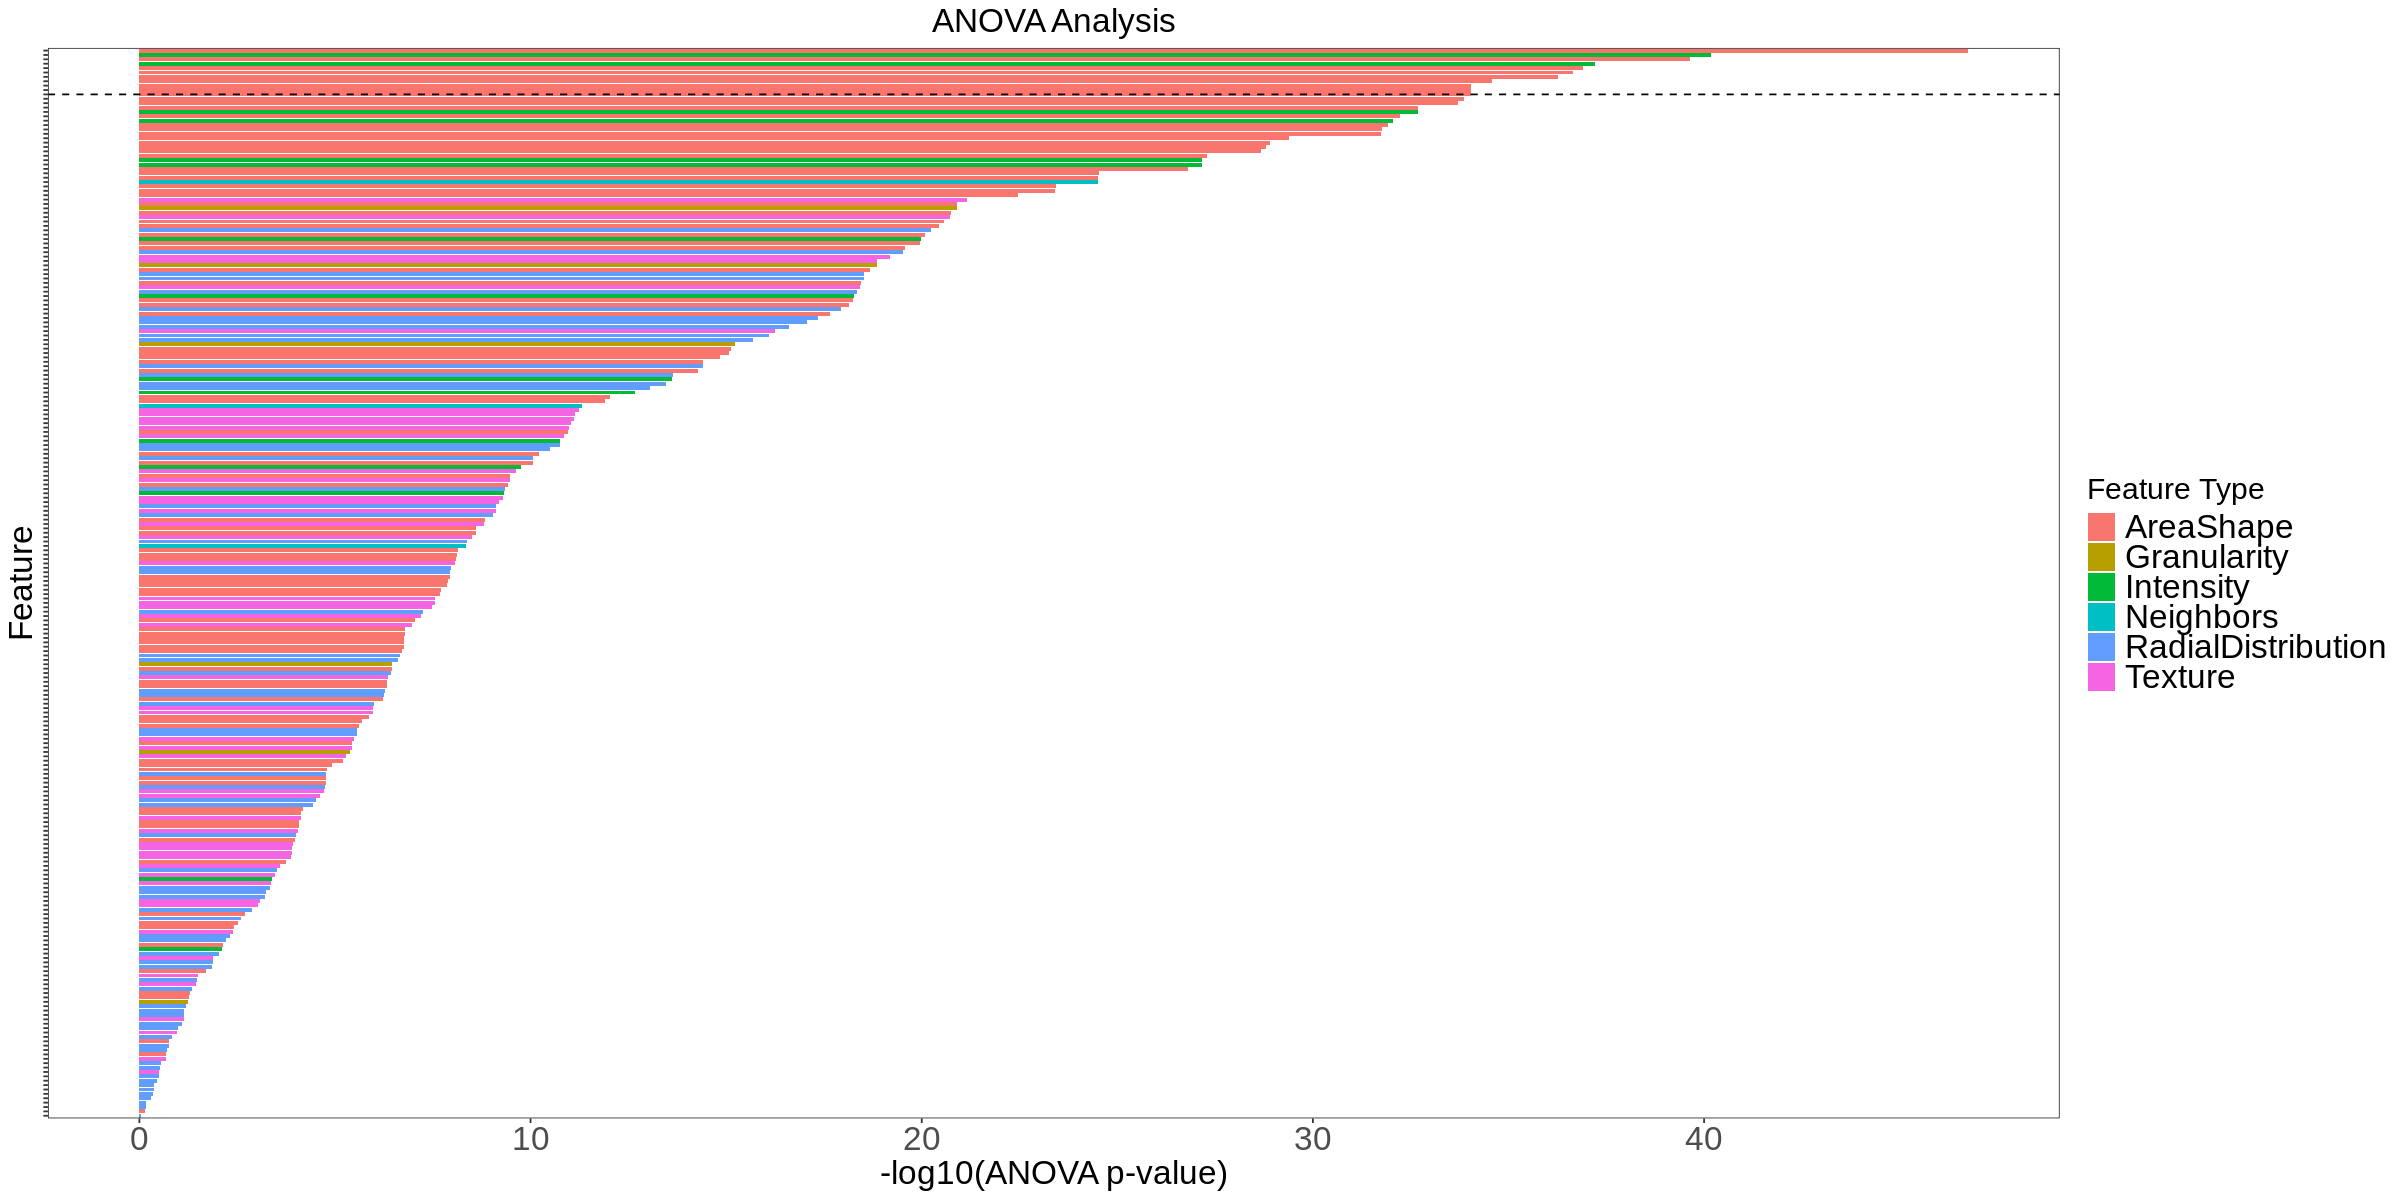

In [4]:
width <- 20
height <- 10
options(repr.plot.width = width, repr.plot.height = height)
anova_plot <- (
    # order the results by log10 anova p-value
    ggplot(sum_aggregated_anova_df, aes(y = reorder(feature, log10_anova_p_value), x = log10_anova_p_value, fill = feature_type))
    + geom_bar(stat = "identity")
    # drop y axis labels
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    + labs(title = "ANOVA Analysis", y = "Feature", x = "-log10(ANOVA p-value)", fill = "Feature Type")
   
    + figure_theme


    + theme(axis.text.y = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
    + theme(axis.text.y = element_blank())
    + geom_hline(yintercept = length(unique(sum_aggregated_anova_df$feature))-10, linetype = "dashed", color = "black")
     
)
anova_plot
# save the plot
ggsave(file = "sum_aggregatednova_plot.png", plot = anova_plot, path = file.path(fig_path), width = width, height = height, dpi = 600)

## Test for equality of variance 

In [5]:
# load levene data in 
sum_aggregated_levene_df_path <- file.path("..","..","data","6.analysis_results","sum_aggregated_levene_test_results.csv")
sum_aggregated_levene_df <- read.csv(sum_aggregated_levene_df_path)
head(sum_aggregated_levene_df)

,X,feature,levene_statistic,levene_p_value,group
,<int>,<chr>,<dbl>,<dbl>,<chr>
1,90,AreaShape_Zernike_8_4,1.841247e-05,0.9966091,high_vs_unsel
2,540,AreaShape_NormalizedMoment_3_3,4.582473e-05,0.9946505,unsel_vs_wt
3,920,RadialDistribution_ZernikePhase_OP_9_3,1.116004e-02,0.9889052,all
4,248,AreaShape_CentralMoment_0_3,2.635471e-04,0.9871715,high_vs_wt
5,188,RadialDistribution_ZernikePhase_OP_9_3,3.381151e-04,0.9854698,high_vs_unsel
6,923,RadialDistribution_ZernikePhase_OP_9_9,2.116843e-02,0.9790653,all


### Variances

In [6]:
width <- 4
height <- 4
options(repr.plot.width = width, repr.plot.height = height)
# make a new column for the group1 and group2
sum_aggregated_anova_df$comparison <- paste(sum_aggregated_anova_df$group1, sum_aggregated_anova_df$group2, sep = " - ")

# order the results by anova p-value
sum_aggregated_anova_df <- sum_aggregated_anova_df %>% arrange(anova_p_value)
features <- unique(sum_aggregated_anova_df$feature)[1:20]
features
top_20_sum_aggregated_anova_df <- sum_aggregated_anova_df %>% filter(feature %in% features)
top_20_sum_aggregated_anova_df$log10_tukey_p_value <- -log10(top_20_sum_aggregated_anova_df$`p-adj`)
# make the genotype a factor
# replace the genotype values
sum_aggregated_data_df$Metadata_genotype <- gsub("wt", "Wild Type", sum_aggregated_data_df$Metadata_genotype)
sum_aggregated_data_df$Metadata_genotype <- gsub("unsel", "Mid-Severity", sum_aggregated_data_df$Metadata_genotype)
sum_aggregated_data_df$Metadata_genotype <- gsub("high", "High-Severity", sum_aggregated_data_df$Metadata_genotype)
sum_aggregated_data_df$Metadata_genotype <- factor(
    sum_aggregated_data_df$Metadata_genotype, 
    levels = c("Wild Type", "Mid-Severity", "High-Severity")
)
head(sum_aggregated_data_df)

[1] "AreaShape_Zernike_2_0"               
 [2] "Intensity_MeanIntensityEdge_OP"      
 [3] "AreaShape_Zernike_0_0"               
 [4] "Intensity_MaxIntensityEdge_OP"       
 [5] "AreaShape_MinorAxisLength"           
 [6] "AreaShape_MinFeretDiameter"          
 [7] "AreaShape_MedianRadius"              
 [8] "AreaShape_MeanRadius"                
 [9] "AreaShape_Area"                      
[10] "AreaShape_CentralMoment_0_0"         
[11] "AreaShape_SpatialMoment_0_0"         
[12] "AreaShape_ConvexArea"                
[13] "AreaShape_MaximumRadius"             
[14] "AreaShape_InertiaTensorEigenvalues_1"
[15] "Intensity_StdIntensityEdge_OP"       
[16] "AreaShape_HuMoment_0"                
[17] "Intensity_LowerQuartileIntensity_OP" 
[18] "AreaShape_EquivalentDiameter"        
[19] "AreaShape_NormalizedMoment_2_0"      
[20] "AreaShape_SpatialMoment_1_0"

Metadata_genotype,Metadata_replicate,AreaShape_Area,AreaShape_CentralMoment_0_0,AreaShape_CentralMoment_0_1,AreaShape_CentralMoment_0_2,AreaShape_CentralMoment_0_3,AreaShape_CentralMoment_1_0,AreaShape_CentralMoment_1_1,AreaShape_CentralMoment_1_2,⋯,Texture_SumEntropy_OP_3_02_256,Texture_SumEntropy_OP_3_03_256,Texture_SumVariance_OP_3_00_256,Texture_SumVariance_OP_3_01_256,Texture_SumVariance_OP_3_02_256,Texture_SumVariance_OP_3_03_256,Texture_Variance_OP_3_00_256,Texture_Variance_OP_3_01_256,Texture_Variance_OP_3_02_256,Texture_Variance_OP_3_03_256
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High-Severity,1,1.192966,1.192966,0.54175256,-0.09847487,0.7817362,4.2018303,-0.9278737,-0.08596449,⋯,-0.2082104,-0.23807266,-1.0917116,-1.0500536,-1.0866094,-1.0891776,-1.1151266,-1.1242028,-1.1179528,-1.1217436
High-Severity,10,2.477908,2.477908,1.31962606,3.44472838,-1.7485946,0.3583902,-3.2895193,1.65054027,⋯,1.2939544,1.27071208,1.2613638,1.2841820,1.1875076,1.2705476,1.1157257,1.0969468,1.1219693,1.0955390
High-Severity,11,4.262414,4.262414,1.26173108,2.85293883,0.5831822,3.6024137,-0.5413249,-0.32861304,⋯,1.3735418,1.35646086,1.1047649,1.1416459,1.0525320,1.0969493,0.9976509,0.9725370,1.0001664,0.9804259
High-Severity,12,2.402476,2.402476,0.04988604,2.55823835,-0.9281710,-3.3057063,-1.9646186,0.21535923,⋯,0.6190094,0.61786654,-0.1095573,-0.1197524,-0.1967998,-0.1358605,-0.2075640,-0.2187347,-0.2021711,-0.2135436
High-Severity,13,2.389777,2.389777,-1.10873607,-0.06893111,0.1017650,-2.6899598,-0.9673454,-1.58886766,⋯,0.1134128,0.09548279,-0.6503412,-0.5913477,-0.6420772,-0.6448712,-0.6968174,-0.7125095,-0.7005716,-0.7043354
High-Severity,14,4.553584,4.553584,-4.77707191,3.38343805,0.2514737,-1.4277740,-3.1808175,0.22174791,⋯,2.0541319,2.05166800,2.5108502,2.5418673,2.4192843,2.4975101,2.3347969,2.2960604,2.3437433,2.3082576


In [7]:
width <- 8
height <- 8

list_of_genotype_anova_plots_by_genotype <- list()

for (i in 1:length(features)){
    print(features[i])
    # get the top feature
    tmp <- sum_aggregated_data_df %>% select(c("Metadata_genotype", features[i]))
    # aggregate the data to get the mean and standard deviation of the top feature
    tmp <- tmp %>% group_by(Metadata_genotype) %>% summarise(mean = mean(!!as.name(features[i])), sd = sd(!!as.name(features[i])))
    # calculate the variance where variance = sd^2
    tmp$variance <- tmp$sd^2
    title <- gsub("_", " ", features[i])
    # plot the variability of the top feature
    var_plot <- (
        ggplot(tmp, aes(x = Metadata_genotype, y = variance, fill = Metadata_genotype)) 
        + geom_bar(stat = "identity")
        + theme(axis.text.x = element_text(angle = 90, hjust = 1))
        + labs(title = title, x = "Genotype", y = "Variance", fill = "Genotype")
        + theme_bw()
        + figure_theme
    )
    # save var plot
    ggsave(file = paste0("sum_aggregated_", features[i], "_variance_plot_genotype.png"), plot = var_plot, path = file.path(fig_path), width = width, height = height, dpi = 600)

    list_of_genotype_anova_plots_by_genotype[[i]] <- var_plot
}

[1] "AreaShape_Zernike_2_0"


[1] "Intensity_MeanIntensityEdge_OP"


[1] "AreaShape_Zernike_0_0"


[1] "Intensity_MaxIntensityEdge_OP"


[1] "AreaShape_MinorAxisLength"


[1] "AreaShape_MinFeretDiameter"


[1] "AreaShape_MedianRadius"


[1] "AreaShape_MeanRadius"


[1] "AreaShape_Area"


[1] "AreaShape_CentralMoment_0_0"


[1] "AreaShape_SpatialMoment_0_0"


[1] "AreaShape_ConvexArea"


[1] "AreaShape_MaximumRadius"


[1] "AreaShape_InertiaTensorEigenvalues_1"


[1] "Intensity_StdIntensityEdge_OP"


[1] "AreaShape_HuMoment_0"


[1] "Intensity_LowerQuartileIntensity_OP"


[1] "AreaShape_EquivalentDiameter"


[1] "AreaShape_NormalizedMoment_2_0"


[1] "AreaShape_SpatialMoment_1_0"
